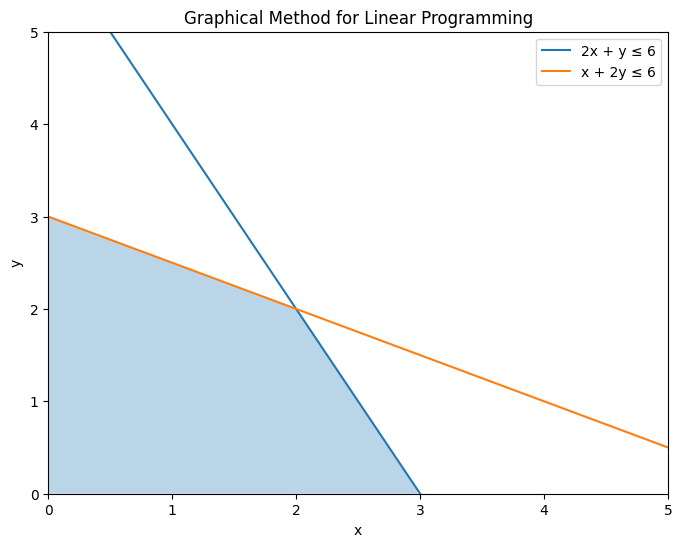

In [1]:
#Graphical
import numpy as np
import matplotlib.pyplot as plt

c = np.array([3, 2])

A = np.array([[2, 1],
              [1, 2]])
b = np.array([6, 6])

x_range = np.linspace(0, 5, 100)

plt.figure(figsize=(8, 6))
plt.plot(x_range, (b[0] - A[0, 0] * x_range) / A[0, 1], label='2x + y ≤ 6')
plt.plot(x_range, (b[1] - A[1, 0] * x_range) / A[1, 1], label='x + 2y ≤ 6')
plt.fill_between(x_range, np.minimum((b[0] - A[0, 0] * x_range) / A[0, 1], (b[1] - A[1, 0] * x_range) / A[1, 1]), 0, where=((b[0] - A[0, 0] * x_range) / A[0, 1] >= 0) & ((b[1] - A[1, 0] * x_range) / A[1, 1] >= 0), alpha=0.3)
plt.xlim(0, 5)
plt.ylim(0, 5)

plt.xlabel('x')
plt.ylabel('y')
plt.title('Graphical Method for Linear Programming')
plt.legend()
plt.show()

In [2]:
#Simplex
import lippy as lp
c_vec = [6, 6, 6]
a_matrix = [
    [4, 1, 1],
    [1, 2, 0],
    [0, 0.5, 4]
]
b_vec = [5, 3, 8]

simplex = lp.SimplexMethod(c_vec, a_matrix, b_vec)
solution, func_value = simplex.solve()
print(solution, func_value)

[0.47368421 1.26315789 1.84210526] 21.473684210526315


In [4]:
#BigM
from BigM import BigM
from BigM import graph
from BigM import InputHandling
import numpy as np

lp = ["Max Z = x+5y","6x+5y<=60","x+2y<=14", "x<=9"]

bm = BigM.BigM()
formattedInput = np.array(InputHandling.formatUserInput(lp))

results = bm.runBigM(formattedInput)

graph.drawGraph(formattedInput, slider=True)

ModuleNotFoundError: No module named 'BigM'

In [ ]:
#Two phased
import numpy as np
from scipy.optimize import linprog
obj = [-5,3,4,-7]
lhs = [[1,1,1,1],
      [1,0,1,0],
      [2,1,1,0]]
rhs = [14,7,13]
bnd = [(0,float('inf')),(0,float('inf')),(0,float('inf')),(0,float('inf'))] #There are 4 bounds because 4 variables

optimize = linprog(c = obj,
                  A_ub = lhs,
                  b_ub = rhs,
                  bounds = bnd,
                  method = 'simplex')
optimize

<ipython-input-18-bd7161e7f78a>:10: DeprecationWarning: `method='simplex'` is deprecated and will be removed in SciPy 1.11.0. Please use one of the HiGHS solvers (e.g. `method='highs'`) in new code.
  optimize = linprog(c = obj,


 message: Optimization terminated successfully.
 success: True
  status: 0
     fun: -98.0
       x: [ 0.000e+00  0.000e+00  0.000e+00  1.400e+01]
     nit: 7

In [ ]:
#Dual Simplex
import lippy as lp
c_vec = [6, 6, 6]
a_matrix = [
    [4, 1, 1],
    [1, 2, 0],
    [0, 0.5, 4]
]
b_vec = [5, 3, 8]

c_vec, a_matrix, b_vec = lp.primal_to_dual_lp(c_vec, a_matrix, b_vec)
simplex = lp.SimplexMethod(c_vec, a_matrix, b_vec)
solution, func_value = simplex.solve()
print(solution, func_value)

[0.94736842 2.21052632 1.26315789] -21.473684210526315
